In [1]:
from fbprophet import Prophet
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import log
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn import preprocessing

In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
kw_list1 = ['Roofing materials']
kw_list2 = ['GAF Timberline HD']
kw_list3 = ['Carlisle']
kw_list4 = ['gaf shingles']

In [4]:
pytrends.build_payload(kw_list1, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df1 = pytrends.interest_over_time()
interest_over_time_df1 = interest_over_time_df1.drop(columns=['isPartial'])

print(interest_over_time_df1)

            Roofing materials
date                         
2014-09-21                 85
2014-09-28                 71
2014-10-05                 66
2014-10-12                 83
2014-10-19                 83
...                       ...
2019-08-18                 70
2019-08-25                 68
2019-09-01                 60
2019-09-08                 60
2019-09-15                 45

[261 rows x 1 columns]


In [5]:
pytrends.build_payload(kw_list2, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df2 = pytrends.interest_over_time()
interest_over_time_df2 = interest_over_time_df2.drop(columns=['isPartial'])

print(interest_over_time_df2)

            GAF Timberline HD
date                         
2014-09-21                 33
2014-09-28                 39
2014-10-05                 30
2014-10-12                 24
2014-10-19                 29
...                       ...
2019-08-18                 75
2019-08-25                 52
2019-09-01                 57
2019-09-08                 65
2019-09-15                 21

[261 rows x 1 columns]


In [6]:
pytrends.build_payload(kw_list3, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df3 = pytrends.interest_over_time()
interest_over_time_df3 = interest_over_time_df3.drop(columns=['isPartial'])

print(interest_over_time_df3)

            Carlisle
date                
2014-09-21        73
2014-09-28        78
2014-10-05        72
2014-10-12        75
2014-10-19        70
...              ...
2019-08-18        92
2019-08-25        77
2019-09-01        79
2019-09-08        79
2019-09-15        73

[261 rows x 1 columns]


In [7]:
pytrends.build_payload(kw_list4, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df4 = pytrends.interest_over_time()
interest_over_time_df4 = interest_over_time_df4.drop(columns=['isPartial'])

print(interest_over_time_df4)

            gaf shingles
date                    
2014-09-21            69
2014-09-28            67
2014-10-05            62
2014-10-12            91
2014-10-19            72
...                  ...
2019-08-18            85
2019-08-25            97
2019-09-01            70
2019-09-08            92
2019-09-15            75

[261 rows x 1 columns]


In [8]:
interest_over_time_df = pd.concat([interest_over_time_df1,interest_over_time_df2,interest_over_time_df3,interest_over_time_df4], axis=1)
print(interest_over_time_df)

            Roofing materials  GAF Timberline HD  Carlisle  gaf shingles
date                                                                    
2014-09-21                 85                 33        73            69
2014-09-28                 71                 39        78            67
2014-10-05                 66                 30        72            62
2014-10-12                 83                 24        75            91
2014-10-19                 83                 29        70            72
...                       ...                ...       ...           ...
2019-08-18                 70                 75        92            85
2019-08-25                 68                 52        77            97
2019-09-01                 60                 57        79            70
2019-09-08                 60                 65        79            92
2019-09-15                 45                 21        73            75

[261 rows x 4 columns]


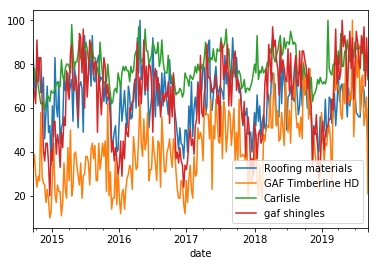

In [9]:
pd.plotting.register_matplotlib_converters()
interest_over_time_df.plot()
pyplot.show()

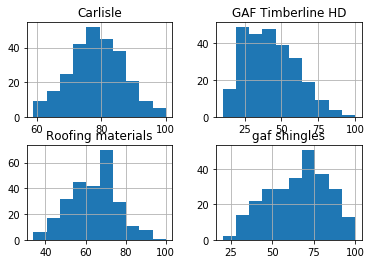

In [10]:
interest_over_time_df.hist()
pyplot.show()

===== CHECK FOR STATIONARITY FOR ALL 4 TIMESERIES =====

In [11]:
#Determing rolling statistics
ts = interest_over_time_df['GAF Timberline HD']
rolmean = ts.rolling(20).mean()
rolstd = ts.rolling(20).std()

print(rolmean,rolstd)

date
2014-09-21      NaN
2014-09-28      NaN
2014-10-05      NaN
2014-10-12      NaN
2014-10-19      NaN
              ...  
2019-08-18    69.55
2019-08-25    68.70
2019-09-01    68.15
2019-09-08    68.55
2019-09-15    66.85
Name: GAF Timberline HD, Length: 261, dtype: float64 date
2014-09-21          NaN
2014-09-28          NaN
2014-10-05          NaN
2014-10-12          NaN
2014-10-19          NaN
                ...    
2019-08-18    12.696767
2019-08-25    13.290677
2019-09-01    13.546314
2019-09-08    13.315899
2019-09-15    16.840662
Name: GAF Timberline HD, Length: 261, dtype: float64


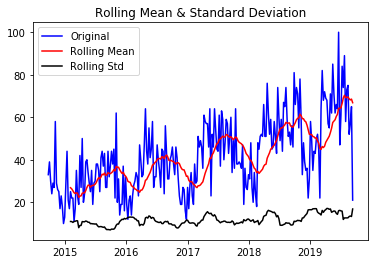

In [12]:
#Plot rolling statistics:
orig = pyplot.plot(ts, color='blue',label='Original')
mean = pyplot.plot(rolmean, color='red', label='Rolling Mean')
std = pyplot.plot(rolstd, color='black', label = 'Rolling Std')
pyplot.legend(loc='best')
pyplot.title('Rolling Mean & Standard Deviation')
pyplot.show(block=False)

In [17]:
#Perform Dickey-Fuller test:
# Since here Critical value is not more than the Test Statistic value, so here we cannot reject the null hypothesis and data is not stationary
print('Results of Dickey-Fuller Test:')
dftest = adfuller(rolmean.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.705593
p-value                          0.073075
#Lags Used                       5.000000
Number of Observations Used    236.000000
Critical Value (10%)            -2.573339
Critical Value (5%)             -2.873866
Critical Value (1%)             -3.458366
dtype: float64


In [14]:
#Perform Dickey-Fuller test:
# Since here Critical value is not more than the Test Statistic value, so here we cannot reject the null hypothesis and data is not stationary
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.588835
p-value                          0.095327
#Lags Used                       4.000000
Number of Observations Used    256.000000
Critical Value (10%)            -2.572822
Critical Value (5%)             -2.872897
Critical Value (1%)             -3.456155
dtype: float64


In [18]:
#Perform Dickey-Fuller test for Roofing materials, gaf shingles and Carlisle:
# Since here Critical value is more than the Test Statistic value for Roofing materials, gaf shingles and Carlisle, so here we reject the null hypothesis and data is stationary
ts_others = interest_over_time_df['Roofing materials']
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_others, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -4.466021
p-value                          0.000226
#Lags Used                      10.000000
Number of Observations Used    250.000000
Critical Value (10%)            -2.572969
Critical Value (5%)             -2.873172
Critical Value (1%)             -3.456781
dtype: float64


=========Non-Stationary to Stationary=========

==============METHOD 1: 
MOVING AVERAGE TO MAKE STATIONARY===================

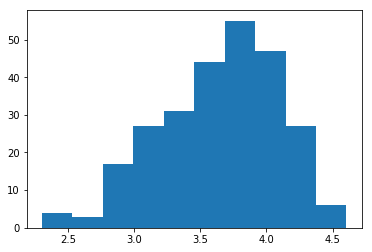

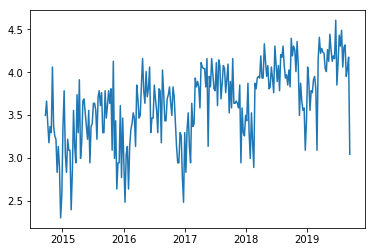

In [19]:
# #Log Tranformation to reduce trend
# #Taking log to flatten out exponential change back to a linear relationship.
ts_logscale = np.log(ts)
pyplot.hist(ts_logscale)
pyplot.show()
pyplot.plot(ts_logscale)
pyplot.show()

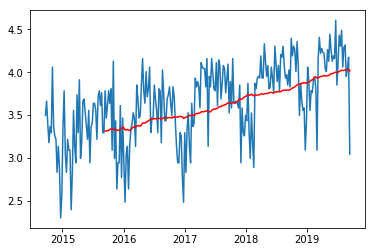

In [20]:
moving_avg = ts_logscale.rolling(52).mean()
moving_std = ts_logscale.rolling(52).std()
pyplot.plot(ts_logscale)
pyplot.plot(moving_avg, color='red')

In [21]:
ts_log_moving_avg_diff = ts_logscale - moving_avg
ts_log_moving_avg_diff

#Remove NaN
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2015-09-13    0.467304
2015-09-20    0.149442
2015-09-27    0.295636
2015-10-04    0.461543
2015-10-11    0.306102
Name: GAF Timberline HD, dtype: float64

In [22]:
def test_stationarity(timeseries):

    #Determing rolling statistics
#     ts = interest_over_time_df['GAF Timberline HD']
    moving_avg = timeseries.rolling(52).mean()
    moving_std = timeseries.rolling(52).std()

    #Plot rolling statistics:
    orig = pyplot.plot(timeseries, color='blue',label='Original')
    mean = pyplot.plot(moving_avg, color='red', label='Rolling Mean')
    std = pyplot.plot(moving_std, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean & Standard Deviation')
    pyplot.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

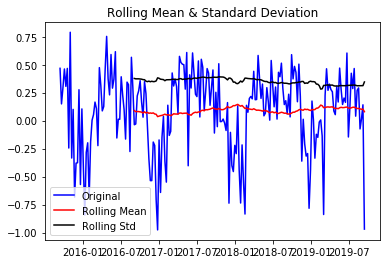

Results of Dickey-Fuller Test:
Test Statistic                  -3.937819
p-value                          0.001773
#Lags Used                       2.000000
Number of Observations Used    207.000000
Critical Value (10%)            -2.574267
Critical Value (5%)             -2.875606
Critical Value (1%)             -3.462342
dtype: float64


In [23]:
test_stationarity(ts_log_moving_avg_diff)

In [24]:
print(ts_log_moving_avg_diff)

date
2015-09-13    0.467304
2015-09-20    0.149442
2015-09-27    0.295636
2015-10-04    0.461543
2015-10-11    0.306102
                ...   
2019-08-18    0.292440
2019-08-25   -0.074178
2019-09-01    0.016230
2019-09-08    0.141331
2019-09-15   -0.969672
Name: GAF Timberline HD, Length: 210, dtype: float64


================= METHOD 2: EXPONENTIALLY WEIGHTED MOVING AVERAGE TO MAKE STATIONARY===============

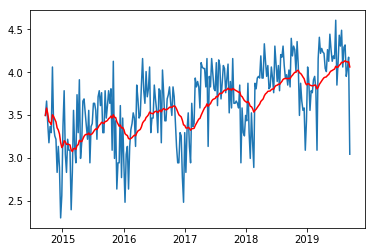

In [25]:
#take a ‘weighted moving average’ where more recent values are given a higher weight
#‘halflife’ is used to define the amount of exponential decay
#Calculate weighted average timeseries to see the trend present in time series

expwighted_avg = ts_logscale.ewm(halflife=12, min_periods=0, adjust = True).mean()
pyplot.plot(ts_logscale)
pyplot.plot(expwighted_avg, color='red')

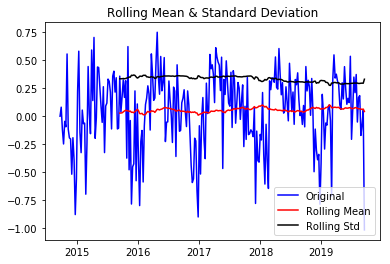

Results of Dickey-Fuller Test:
Test Statistic                  -3.809399
p-value                          0.002813
#Lags Used                       7.000000
Number of Observations Used    253.000000
Critical Value (10%)            -2.572895
Critical Value (5%)             -2.873033
Critical Value (1%)             -3.456464
dtype: float64


In [26]:
ts_log_ewma_diff = ts_logscale - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [27]:
print(ts_log_ewma_diff)

date
2014-09-21    0.000000
2014-09-28    0.081115
2014-10-05   -0.117311
2014-10-12   -0.247831
2014-10-19   -0.045480
                ...   
2019-08-18    0.184377
2019-08-25   -0.171660
2019-09-01   -0.075371
2019-09-08    0.052824
2019-09-15   -1.016591
Name: GAF Timberline HD, Length: 261, dtype: float64


In [28]:
GC1 = pd.concat([interest_over_time_df['gaf shingles'], interest_over_time_df['Roofing materials'],ts_log_ewma_diff], axis=1)
print(GC1)

            gaf shingles  Roofing materials  GAF Timberline HD
date                                                          
2014-09-21            69                 85           0.000000
2014-09-28            67                 71           0.081115
2014-10-05            62                 66          -0.117311
2014-10-12            91                 83          -0.247831
2014-10-19            72                 83          -0.045480
...                  ...                ...                ...
2019-08-18            85                 70           0.184377
2019-08-25            97                 68          -0.171660
2019-09-01            70                 60          -0.075371
2019-09-08            92                 60           0.052824
2019-09-15            75                 45          -1.016591

[261 rows x 3 columns]


In [29]:
GC1["Roofing materials"]=((GC1["Roofing materials"]-GC1["Roofing materials"].min())/(GC1["Roofing materials"].max()-GC1["Roofing materials"].min()))



In [30]:

GC1["gaf shingles"]=((GC1["gaf shingles"]-GC1["gaf shingles"].min())/(GC1["gaf shingles"].max()-GC1["gaf shingles"].min()))
print(GC1["gaf shingles"])                      

date
2014-09-21    0.6125
2014-09-28    0.5875
2014-10-05    0.5250
2014-10-12    0.8875
2014-10-19    0.6500
               ...  
2019-08-18    0.8125
2019-08-25    0.9625
2019-09-01    0.6250
2019-09-08    0.9000
2019-09-15    0.6875
Name: gaf shingles, Length: 261, dtype: float64


In [31]:
GC1["GAF Timberline HD"]=((GC1["GAF Timberline HD"]-GC1["GAF Timberline HD"].min())/(GC1["GAF Timberline HD"].max()-GC1["GAF Timberline HD"].min()))
print(GC1)



            gaf shingles  Roofing materials  GAF Timberline HD
date                                                          
2014-09-21        0.6125           0.772727           0.575011
2014-09-28        0.5875           0.560606           0.620892
2014-10-05        0.5250           0.484848           0.508657
2014-10-12        0.8875           0.742424           0.434832
2014-10-19        0.6500           0.742424           0.549287
...                  ...                ...                ...
2019-08-18        0.8125           0.545455           0.679300
2019-08-25        0.9625           0.515152           0.477916
2019-09-01        0.6250           0.393939           0.532380
2019-09-08        0.9000           0.393939           0.604890
2019-09-15        0.6875           0.166667           0.000000

[261 rows x 3 columns]


=========== GRANGER CAUSALITY TEST ===========

In [32]:
#data to test whether the time series in the second column Granger causes the time series in the first column

#the null hypothesis of the granger causality is commonly that the X does not granger cause Y, 
#so a low value of F statistic which results in a p-value above 0.05 will conclude
#not to reject the null hypothesis of X does not granger cause Y.
## HERE, the P-Values are Zero and are less than a significance level (0.05) then we can reject 
#the null hypothesis and conclude that KEYWORD ‘gaf shingles’ indeed can be used to forecast the keyword 'GAF Timberline HD'
grangercausalitytests(GC1[['GAF Timberline HD','gaf shingles']], maxlag= 2)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=30.2860 , p=0.0000  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=30.6395 , p=0.0000  , df=1
likelihood ratio test: chi2=28.9645 , p=0.0000  , df=1
parameter F test:         F=30.2860 , p=0.0000  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.9943  , p=0.0001  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=20.3821 , p=0.0000  , df=2
likelihood ratio test: chi2=19.6199 , p=0.0001  , df=2
parameter F test:         F=9.9943  , p=0.0001  , df_denom=254, df_num=2


{1: ({'lrtest': (28.96452885236863, 7.371583784909265e-08, 1),
   'params_ftest': (30.285966587451767, 9.012949092109531e-08, 257.0, 1.0),
   'ssr_chi2test': (30.639499271351994, 3.1070358509302926e-08, 1),
   'ssr_ftest': (30.28596658745178, 9.012949092109531e-08, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (19.619886565508068, 5.4902960655370537e-05, 2),
   'params_ftest': (9.994330839792328, 6.635030911785241e-05, 254.0, 2.0),
   'ssr_chi2test': (20.38213927170245, 3.750374978009115e-05, 2),
   'ssr_ftest': (9.99433083979232, 6.635030911785241e-05, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [33]:
grangercausalitytests(interest_over_time_df[['Roofing materials','Carlisle']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=29.6477 , p=0.0000  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=29.9938 , p=0.0000  , df=1
likelihood ratio test: chi2=28.3862 , p=0.0000  , df=1
parameter F test:         F=29.6477 , p=0.0000  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.1853 , p=0.0000  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=26.8896 , p=0.0000  , df=2
likelihood ratio test: chi2=25.5834 , p=0.0000  , df=2
parameter F test:         F=13.1853 , p=0.0000  , df_denom=254, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.1011  , p=0.0000  , df_denom=251, df_num=3
ssr based chi2 test:   chi2=24.9810 , p=0.0000  , df=3
likelihood ratio test: chi2=23.8444 , p=0.0000  , df=3
parameter F test:         F=8.1011  , p=0.0000  , df_denom=251, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.4707  , p=0.0001  

{1: ({'lrtest': (28.386224401914205, 9.936988693854274e-08, 1),
   'params_ftest': (29.647681498752387, 1.2102416445770045e-07, 257.0, 1.0),
   'ssr_chi2test': (29.99376338396489, 4.334381194903006e-08, 1),
   'ssr_ftest': (29.647681498765294, 1.2102416445697737e-07, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (25.58342265882993, 2.7837508043921498e-06, 2),
   'params_ftest': (13.185252509810251, 3.5635009077955904e-06, 254.0, 2.0),
   'ssr_chi2test': (26.889609449140764, 1.4487568348159683e-06, 2),
   'ssr_ftest': (13.185252509810335, 3.563500907795313e-06, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (23.84436207865565, 2.6920374253790522e-05, 3),
   'params_ftest': (8.101058538278222, 3.593328371766147e-05, 251.0, 3.0),
   'ssr_chi2test': (24.98095342082611, 1.5582732074362777e-05, 3),
   'ssr_ftest': (8.101058538278235, 3.593328371766147e-05, 251.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.,

In [34]:
grangercausalitytests(GC1[['GAF Timberline HD','Roofing materials']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.3238 , p=0.0000  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=19.5494 , p=0.0000  , df=1
likelihood ratio test: chi2=18.8493 , p=0.0000  , df=1
parameter F test:         F=19.3238 , p=0.0000  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.8593  , p=0.0013  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=13.9887 , p=0.0009  , df=2
likelihood ratio test: chi2=13.6240 , p=0.0011  , df=2
parameter F test:         F=6.8593  , p=0.0013  , df_denom=254, df_num=2


{1: ({'lrtest': (18.84933354810289, 1.4146051757991052e-05, 1),
   'params_ftest': (19.32384286984175, 1.6157216677125174e-05, 257.0, 1.0),
   'ssr_chi2test': (19.549413020073402, 9.803085279591048e-06, 1),
   'ssr_ftest': (19.323842869841783, 1.6157216677125174e-05, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (13.624037731437625, 0.0011004689567403266, 2),
   'params_ftest': (6.8593402150077285, 0.0012551342876515519, 254.0, 2.0),
   'ssr_chi2test': (13.988733194385825, 0.00091703346057862, 2),
   'ssr_ftest': (6.859340215007721, 0.0012551342876515519, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [35]:
grangercausalitytests(interest_over_time_df[['Roofing materials','gaf shingles']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=26.9033 , p=0.0000  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=27.2174 , p=0.0000  , df=1
likelihood ratio test: chi2=25.8850 , p=0.0000  , df=1
parameter F test:         F=26.9033 , p=0.0000  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.8836 , p=0.0000  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=22.1957 , p=0.0000  , df=2
likelihood ratio test: chi2=21.2957 , p=0.0000  , df=2
parameter F test:         F=10.8836 , p=0.0000  , df_denom=254, df_num=2


{1: ({'lrtest': (25.884986703432105, 3.6237662647706524e-07, 1),
   'params_ftest': (26.9033110267175, 4.339810193619049e-07, 257.0, 1.0),
   'ssr_chi2test': (27.217357458936487, 1.8181901212904765e-07, 1),
   'ssr_ftest': (26.90331102671799, 4.339810193618129e-07, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (21.29567095338348, 2.3752198183027483e-05, 2),
   'params_ftest': (10.883586661676926, 2.9172653623038358e-05, 254.0, 2.0),
   'ssr_chi2test': (22.195660987198952, 1.5145145693868136e-05, 2),
   'ssr_ftest': (10.883586661676706, 2.917265362304461e-05, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [36]:
grangercausalitytests(interest_over_time_df[['gaf shingles','Roofing materials']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.3178 , p=0.0009  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=11.4499 , p=0.0007  , df=1
likelihood ratio test: chi2=11.2050 , p=0.0008  , df=1
parameter F test:         F=11.3178 , p=0.0009  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3022  , p=0.0384  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=6.7344  , p=0.0345  , df=2
likelihood ratio test: chi2=6.6483  , p=0.0360  , df=2
parameter F test:         F=3.3022  , p=0.0384  , df_denom=254, df_num=2


{1: ({'lrtest': (11.204984686890384, 0.0008157789975132468, 1),
   'params_ftest': (11.317821725341515, 0.0008848428782255957, 257.0, 1.0),
   'ssr_chi2test': (11.449936375831896, 0.0007149644761104765, 1),
   'ssr_ftest': (11.317821725341528, 0.0008848428782255957, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (6.648290044100349, 0.03600328761523841, 2),
   'params_ftest': (3.3021728823022105, 0.03838945992339846, 254.0, 2.0),
   'ssr_chi2test': (6.734352570994246, 0.03448688109086476, 2),
   'ssr_ftest': (3.3021728823021976, 0.038389459923398865, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}